In [1]:
# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

In [2]:
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=0)
    data = dataset.values
    # separate into input and output column
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [3]:
# define dataset
X, y = get_dataset('Sonar.csv')
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(X)
    # RECORD NUMBER OF FEATURES
    num_features.append(data.shape[1])
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


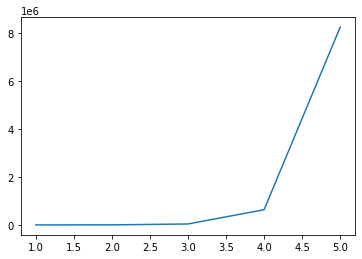

In [4]:
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()